In [1]:
from data_pipline_and_eda_helper_class import *
from model_class import *
data_pipeline = DataPipeline()
import seaborn as sns

In [2]:
data_pipeline.combine_news_sources('occupy_democrats','breitbart')

In [3]:
model_builder = ModelBuilder(data_pipeline.articles_info)

In [5]:
model_builder.vectorize(5000,(1,1))

In [5]:
model_builder.fit_and_score(MultinomialNB(0.1))

0.918548030101815

In [6]:
model_builder.fit_and_score(RandomForestClassifier(n_estimators=60))

0.9513058875608676

In [7]:
reuters = data_pipeline.pipeline('reuters')
fox_news = data_pipeline.pipeline('fox')
huffpost = data_pipeline.pipeline('huffpost')

In [8]:
model_builder.test_bias(fox_news['content'])

'Predicted as Breitbart 93.55% of the time.'

In [9]:
model_builder.test_bias(reuters['content'])

'Predicted as Breitbart 90.0% of the time.'

In [10]:
model_builder.test_bias(huffpost['content'])

'Predicted as Breitbart 91.18% of the time.'

In [11]:
model_builder.get_most_important_words(10)

['trump',
 'said',
 'added',
 'republican',
 'add',
 '2017',
 'monday',
 'donald',
 'chinese',
 'thursday']

In [12]:
model_builder.get_confusion_matrix()

'True Negatives: 1055, True Positives 1094, False Negatives 56, False Positives 54.'

Precision: 0.9529616724738676 
Recal: 0.951304347826087 
Accuracy: 0.9513058875608676


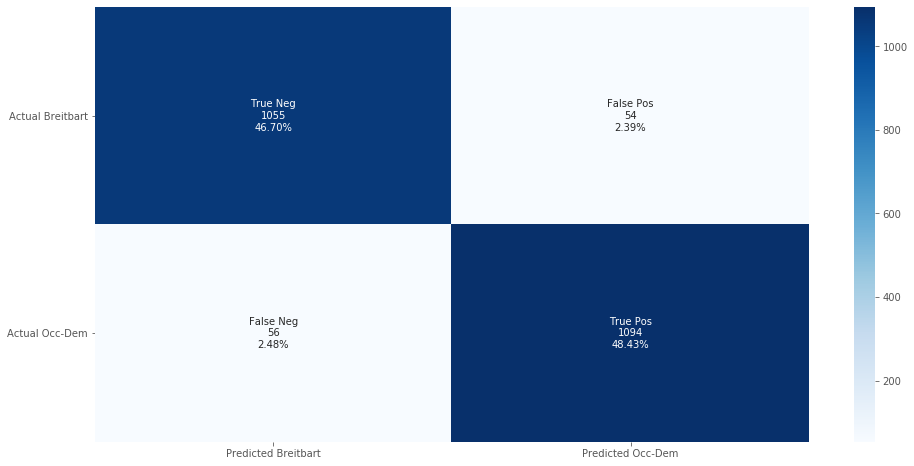

In [13]:
model_builder.plot_confusion_matrix()

In [14]:
model_builder.vectorize(5000,(1,4))
model_builder.fit_and_score(RandomForestClassifier(n_estimators=60))

0.9667994687915007

In [15]:
model_builder.get_most_important_words(10)

['trump',
 'said',
 'added',
 'president donald',
 'add name',
 '2017',
 'republican',
 'donald',
 'president donald trump',
 'add']

In [32]:
print('President Donald Trump :',model_builder.find_word_freq_by_class('President Donald Trump'))
print('trump :',model_builder.find_word_freq_by_class('trump'))

President Donald Trump : Breitbart has this word 1627 times. Occupy Democrats has this word 358 times.
trump : Breitbart has this word 2794 times. Occupy Democrats has this word 5159 times.
